## Import Libraries

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Import Dataset

In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/Datasets/XAI - Traffic Volume/Train.csv')

In [ ]:
df_raw.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           33750 non-null  object 
 2   air_pollution_index  33750 non-null  int64  
 3   humidity             33750 non-null  int64  
 4   wind_speed           33750 non-null  int64  
 5   wind_direction       33750 non-null  int64  
 6   visibility_in_miles  33750 non-null  int64  
 7   dew_point            33750 non-null  int64  
 8   temperature          33750 non-null  float64
 9   rain_p_h             33750 non-null  float64
 10  snow_p_h             33750 non-null  float64
 11  clouds_all           33750 non-null  int64  
 12  weather_type         33750 non-null  object 
 13  weather_description  33750 non-null  object 
 14  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(4)
m

In [ ]:
df_raw['is_holiday'].nunique()

12

In [ ]:
df_raw['weather_description'].nunique()

38

In [ ]:
df_raw['weather_type'].nunique()

11

## Preprocess

what to process?  
- is_holiday
- weather_type
- weather_description

Step?
- one hot encode aja lah bre
- unite the deataframes

In [ ]:
# Convert it to datetime format
df_raw['date_time'] = pd.to_datetime(df_raw['date_time'])

# Set 'date_time' as the index
df_raw.set_index('date_time', inplace=True)

In [ ]:
df_raw.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
date_time,,,,,,,,,,,,,,
2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   is_holiday           33750 non-null  object 
 1   air_pollution_index  33750 non-null  int64  
 2   humidity             33750 non-null  int64  
 3   wind_speed           33750 non-null  int64  
 4   wind_direction       33750 non-null  int64  
 5   visibility_in_miles  33750 non-null  int64  
 6   dew_point            33750 non-null  int64  
 7   temperature          33750 non-null  float64
 8   rain_p_h             33750 non-null  float64
 9   snow_p_h             33750 non-null  float64
 10  clouds_all           33750 non-null  int64  
 11  weather_type         33750 non-null  object 
 12  weather_description  33750 non-null  object 
 13  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 3.

### One Hot encode

In [ ]:
df_is_holiday = pd.get_dummies(df_raw['is_holiday'])

In [ ]:
df_is_holiday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Christmas Day              33750 non-null  uint8
 1   Columbus Day               33750 non-null  uint8
 2   Independence Day           33750 non-null  uint8
 3   Labor Day                  33750 non-null  uint8
 4   Martin Luther King Jr Day  33750 non-null  uint8
 5   Memorial Day               33750 non-null  uint8
 6   New Years Day              33750 non-null  uint8
 7   None                       33750 non-null  uint8
 8   State Fair                 33750 non-null  uint8
 9   Thanksgiving Day           33750 non-null  uint8
 10  Veterans Day               33750 non-null  uint8
 11  Washingtons Birthday       33750 non-null  uint8
dtypes: uint8(12)
memory usage: 659.2 KB


In [ ]:
df_weather_type = pd.get_dummies(df_raw['weather_type'])

In [ ]:
df_weather_type.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Clear         33750 non-null  uint8
 1   Clouds        33750 non-null  uint8
 2   Drizzle       33750 non-null  uint8
 3   Fog           33750 non-null  uint8
 4   Haze          33750 non-null  uint8
 5   Mist          33750 non-null  uint8
 6   Rain          33750 non-null  uint8
 7   Smoke         33750 non-null  uint8
 8   Snow          33750 non-null  uint8
 9   Squall        33750 non-null  uint8
 10  Thunderstorm  33750 non-null  uint8
dtypes: uint8(11)
memory usage: 626.2 KB


In [ ]:
df_weather_description = pd.get_dummies(df_raw['weather_description'])

In [ ]:
df_weather_description.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   SQUALLS                              33750 non-null  uint8
 1   Sky is Clear                         33750 non-null  uint8
 2   broken clouds                        33750 non-null  uint8
 3   drizzle                              33750 non-null  uint8
 4   few clouds                           33750 non-null  uint8
 5   fog                                  33750 non-null  uint8
 6   freezing rain                        33750 non-null  uint8
 7   haze                                 33750 non-null  uint8
 8   heavy intensity drizzle              33750 non-null  uint8
 9   heavy intensity rain                 33750 non-null  uint8
 10  heavy snow                           33750 non-null  uint8
 11  light intensity dri

### Concat all new dataframes

In [ ]:
df_processed = pd.concat([df_raw, df_is_holiday, df_weather_type, df_weather_description], axis=1)

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 75 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   is_holiday                           33750 non-null  object 
 1   air_pollution_index                  33750 non-null  int64  
 2   humidity                             33750 non-null  int64  
 3   wind_speed                           33750 non-null  int64  
 4   wind_direction                       33750 non-null  int64  
 5   visibility_in_miles                  33750 non-null  int64  
 6   dew_point                            33750 non-null  int64  
 7   temperature                          33750 non-null  float64
 8   rain_p_h                             33750 non-null  float64
 9   snow_p_h                             33750 non-null  float64
 10  clouds_all                           33750 non-null  int64 

### Drop object features

In [ ]:
df_processed.drop(columns=['is_holiday', 'weather_type', 'weather_description'], inplace=True)

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 72 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   air_pollution_index                  33750 non-null  int64  
 1   humidity                             33750 non-null  int64  
 2   wind_speed                           33750 non-null  int64  
 3   wind_direction                       33750 non-null  int64  
 4   visibility_in_miles                  33750 non-null  int64  
 5   dew_point                            33750 non-null  int64  
 6   temperature                          33750 non-null  float64
 7   rain_p_h                             33750 non-null  float64
 8   snow_p_h                             33750 non-null  float64
 9   clouds_all                           33750 non-null  int64  
 10  traffic_volume                       33750 non-null  int64 

Move target column into the last column for later convenience

In [ ]:
df_target = df_processed['traffic_volume']

In [ ]:
df_target

date_time
2012-10-02 09:00:00    5545
2012-10-02 10:00:00    4516
2012-10-02 11:00:00    4767
2012-10-02 12:00:00    5026
2012-10-02 13:00:00    4918
                       ... 
2017-05-17 21:00:00    2348
2017-05-17 22:00:00    2194
2017-05-17 22:00:00    2194
2017-05-17 23:00:00    1328
2017-05-17 23:00:00    1328
Name: traffic_volume, Length: 33750, dtype: int64

In [ ]:
df_processed.drop(columns=['traffic_volume'], inplace=True)

In [ ]:
df_processed['traffic_volume'] = df_target

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 72 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   air_pollution_index                  33750 non-null  int64  
 1   humidity                             33750 non-null  int64  
 2   wind_speed                           33750 non-null  int64  
 3   wind_direction                       33750 non-null  int64  
 4   visibility_in_miles                  33750 non-null  int64  
 5   dew_point                            33750 non-null  int64  
 6   temperature                          33750 non-null  float64
 7   rain_p_h                             33750 non-null  float64
 8   snow_p_h                             33750 non-null  float64
 9   clouds_all                           33750 non-null  int64  
 10  Christmas Day                        33750 non-null  uint8 

### Scale

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df_processed)
df_processed_scaled = scaler.transform(df_processed)

In [ ]:
df_processed_scaled

array([[-0.40415257,  1.05572004, -0.67040489, ..., -0.0261141 ,
        -0.02310017,  1.15738423],
       [ 0.27657226, -0.2497631 , -0.18396715, ..., -0.0261141 ,
        -0.02310017,  0.64067732],
       [-0.4996929 , -0.30910324, -0.18396715, ..., -0.0261141 ,
        -0.02310017,  0.76671564],
       ...,
       [-0.20112938, -0.07174267, -1.15684263, ..., -0.0261141 ,
        -0.02310017, -0.52530271],
       [ 0.88564185, -0.30910324, -1.15684263, ..., -0.0261141 ,
        -0.02310017, -0.96016003],
       [-0.17724429, -0.48712367, -1.15684263, ..., -0.0261141 ,
        -0.02310017, -0.96016003]])

### Reshape to fit LSTM needs

In [ ]:
trainX = []
trainY = []

In [ ]:
n_future = 1   # Number of data we want to look into the future based on the past data.
n_past = 14  # Number of past data we want to use to predict the future.

In [ ]:
for i in range(n_past, len(df_processed_scaled) - n_future +1):
    trainX.append(df_processed_scaled[i - n_past:i, 0:df_processed.shape[1]])
    trainY.append(df_processed_scaled[i + n_future - 1:i + n_future, -1])

trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (33736, 14, 72).
trainY shape == (33736, 1).


## Modelling

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            35072     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 47,521
Trainable params: 47,521
Non-trainable params: 0
_________________________________________________________________


Epoch 1/5
1898/1898 [==============================] - 130s 62ms/step - loss: 0.2405 - val_loss: 0.0921
Epoch 2/5
1898/1898 [==============================] - 118s 62ms/step - loss: 0.1276 - val_loss: 0.0758
Epoch 3/5
1898/1898 [==============================] - 118s 62ms/step - loss: 0.1150 - val_loss: 0.0670
Epoch 4/5
1898/1898 [==============================] - 118s 62ms/step - loss: 0.1091 - val_loss: 0.0721
Epoch 5/5
1898/1898 [==============================] - 116s 61ms/step - loss: 0.1044 - val_loss: 0.0747


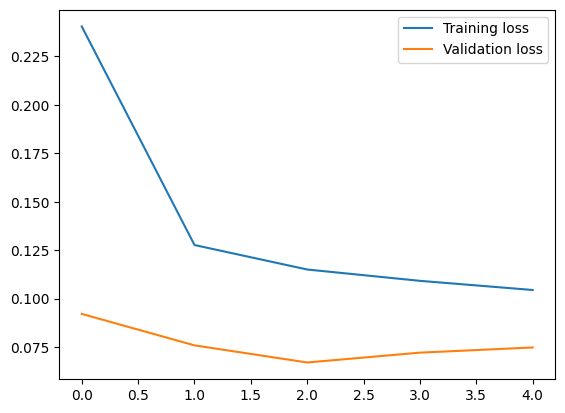

In [ ]:
# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

### Check graphs

In [ ]:
df_raww = pd.read_csv('/content/drive/MyDrive/Datasets/XAI - Traffic Volume/Train.csv')

In [ ]:
#Separate dates for future plotting
train_dates = pd.to_datetime(df_raww['date_time'])
print(train_dates.tail(30)) #Check last few dates.

33720   2017-05-17 10:00:00
33721   2017-05-17 10:00:00
33722   2017-05-17 11:00:00
33723   2017-05-17 12:00:00
33724   2017-05-17 12:00:00
33725   2017-05-17 13:00:00
33726   2017-05-17 13:00:00
33727   2017-05-17 14:00:00
33728   2017-05-17 15:00:00
33729   2017-05-17 16:00:00
33730   2017-05-17 16:00:00
33731   2017-05-17 17:00:00
33732   2017-05-17 17:00:00
33733   2017-05-17 18:00:00
33734   2017-05-17 18:00:00
33735   2017-05-17 18:00:00
33736   2017-05-17 18:00:00
33737   2017-05-17 19:00:00
33738   2017-05-17 19:00:00
33739   2017-05-17 19:00:00
33740   2017-05-17 20:00:00
33741   2017-05-17 20:00:00
33742   2017-05-17 20:00:00
33743   2017-05-17 21:00:00
33744   2017-05-17 21:00:00
33745   2017-05-17 21:00:00
33746   2017-05-17 22:00:00
33747   2017-05-17 22:00:00
33748   2017-05-17 23:00:00
33749   2017-05-17 23:00:00
Name: date_time, dtype: datetime64[ns]


In [ ]:
n_days_for_prediction=200

In [ ]:
prediction = model.predict(trainX[-n_days_for_prediction:])

7/7 [==============================] - 1s 11ms/step


In [ ]:
true = trainY[-n_days_for_prediction:]

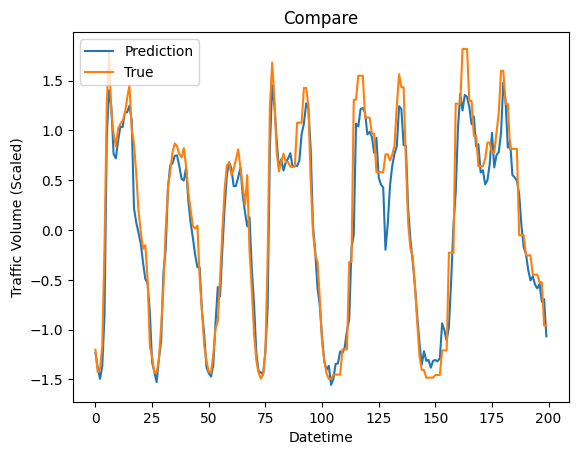

In [ ]:
# Plot the training and validation accuracy
plt.plot(prediction)
plt.plot(true)
plt.title('Compare')
plt.xlabel('Datetime')
plt.ylabel('Traffic Volume (Scaled)')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [ ]:
prediction_copies = np.repeat(prediction, df_processed.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,-1]

In [ ]:
y_pred_future

array([ 782.13184,  487.06104,  262.13013,  518.08813, 1535.4902 ,
       5097.1714 , 6031.519  , 5717.2676 , 4762.0215 , 4674.273  ,
       5021.8354 , 5310.8945 , 5300.3677 , 5595.5654 , 5595.4287 ,
       5727.3184 , 5437.12   , 3677.968  , 3389.6504 , 3187.2012 ,
       2966.7883 , 2590.0647 , 2263.0232 , 2183.1135 , 1597.3083 ,
        597.32886,  403.51807,  197.86694,  661.4719 , 1031.2156 ,
       2386.5398 , 2850.0596 , 4074.8694 , 4536.8965 , 4572.4546 ,
       4723.473  , 4734.2544 , 4520.6167 , 4264.5327 , 4230.4375 ,
       4486.76   , 3819.0247 , 3389.976  , 3083.057  , 2742.4783 ,
       2497.6196 , 2489.0981 , 1626.4165 , 1151.8518 ,  491.49463,
        378.96045,  309.28027,  536.89355, 1383.4198 , 2103.3672 ,
       1912.6819 , 2847.82   , 3674.0803 , 4338.515  , 4596.139  ,
       4472.2476 , 4116.863  , 4121.1646 , 4295.3823 , 4487.7734 ,
       3935.6821 , 3598.0337 , 3313.2476 , 3497.3923 , 2468.0708 ,
       1752.0614 ,  781.5576 ,  414.2566 ,  391.8833 ,  346.76

In [ ]:
true = df_raw['traffic_volume'][-n_days_for_prediction:].values

In [ ]:
true

array([ 846,  399,  449,  929, 2897, 5752, 6815, 5604, 5175, 4913, 5267,
       5367, 5426, 5573, 5877, 6141, 5258, 4970, 4373, 3626, 3206, 2864,
       2938, 2261,  925,  700,  389,  393,  652, 1320, 2087, 3251, 4082,
       4407, 4794, 4972, 4918, 4759, 4693, 4879, 4517, 3999, 3640, 3319,
       3270, 3327, 2267, 1621,  931,  628,  410,  382,  746, 1273, 1411,
       2271, 3214, 4037, 4535, 4589, 4343, 4458, 4658, 4855, 4488, 4134,
       3743, 4338, 2820, 2048, 1157,  632,  384,  268,  359,  793, 2699,
       5723, 6591, 5836, 4786, 4412, 4619, 4768, 4601, 4601, 4506, 4506,
       4506, 5388, 5388, 5388, 6083, 6083, 5714, 4212, 3203, 2734, 2607,
       1877, 1008,  624,  366,  261,  261,  347,  347,  347,  347,  851,
        851,  851, 2604, 2604, 5847, 5847, 6326, 6326, 6326, 5490, 5490,
       5490, 5166, 5166, 4398, 4398, 4398, 4398, 4754, 4754, 4630, 4753,
       4934, 5735, 6357, 6098, 6098, 4632, 3382, 2871, 2720, 2129, 1394,
        722,  440,  440,  287,  287,  287,  287,  3

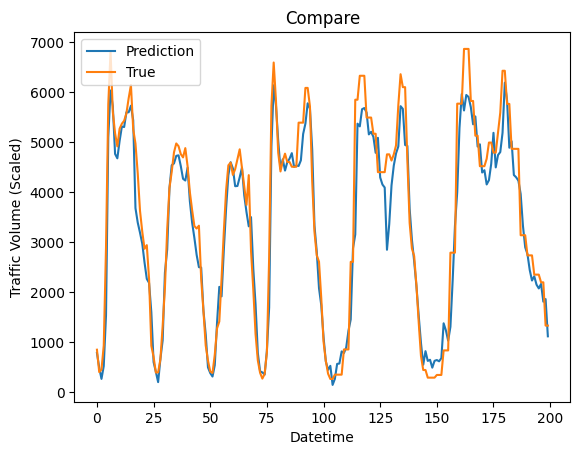

In [ ]:
# Plot the training and validation accuracy
plt.plot(y_pred_future)
plt.plot(true)
plt.title('Compare')
plt.xlabel('Datetime')
plt.ylabel('Traffic Volume (Scaled)')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

## Modelling 2

### Training

In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (33736, 14, 72).
trainY shape == (33736, 1).


In [ ]:
total_samples = trainX.shape[0]
split_index = int(total_samples * 0.9)

X_train = trainX[:split_index]
y_train = trainY[:split_index]
X_test = trainX[split_index:]
y_test = trainY[split_index:]

In [ ]:
len(X_train)

30362

In [ ]:
len(X_test)

3374

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

NameError: ignored

Epoch 1/5
1708/1708 [==============================] - 108s 61ms/step - loss: 0.2700 - val_loss: 0.0724
Epoch 2/5
1708/1708 [==============================] - 106s 62ms/step - loss: 0.1301 - val_loss: 0.0652
Epoch 3/5
1708/1708 [==============================] - 103s 60ms/step - loss: 0.1187 - val_loss: 0.0597
Epoch 4/5
1708/1708 [==============================] - 105s 62ms/step - loss: 0.1118 - val_loss: 0.0596
Epoch 5/5
1708/1708 [==============================] - 108s 63ms/step - loss: 0.1085 - val_loss: 0.0583


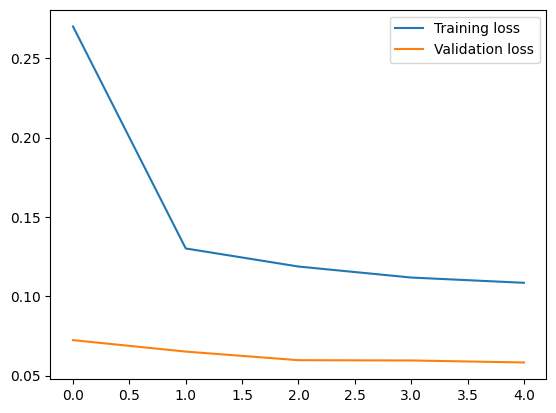

In [ ]:
# fit the model
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

### Predict

In [ ]:
prediction = model.predict(X_test)

106/106 [==============================] - 1s 9ms/step


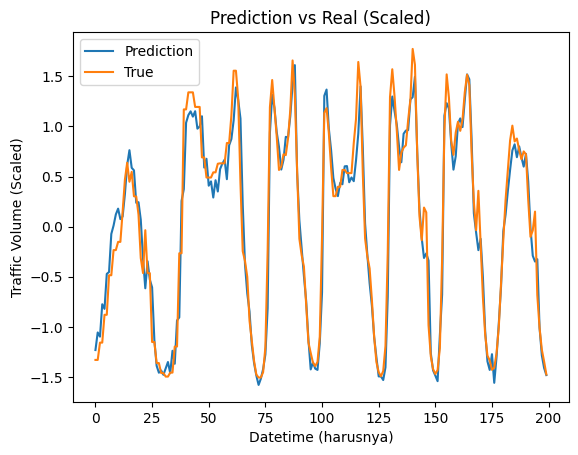

In [ ]:
# Plot the training and validation accuracy
plt.plot(prediction[:200])
plt.plot(y_test[:200])
plt.title('Prediction vs Real (Scaled)')
plt.xlabel('Datetime (harusnya)')
plt.ylabel('Traffic Volume (Scaled)')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [ ]:
prediction_copies = np.repeat(prediction, df_processed.shape[1], axis=-1)
pred_unscaled = scaler.inverse_transform(prediction_copies)[:,-1]

In [ ]:
pred_unscaled

array([ 787.4719, 1136.8652, 1053.7927, ..., 1728.6923, 1844.9332,
       1162.4089], dtype=float32)

In [ ]:
true_value = df_raw['traffic_volume'][split_index+14:].values

In [ ]:
len(df_raw['traffic_volume'])

33750

In [ ]:
len(trainY)

33736

In [ ]:
true_value

array([ 591,  591,  935, ..., 2194, 1328, 1328])

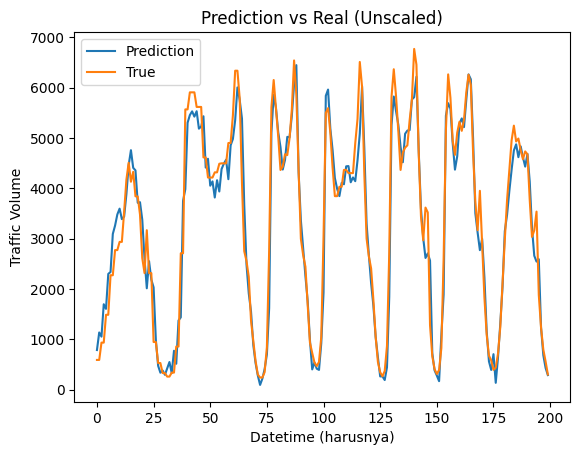

In [ ]:
# Plot Prediction vs Real Data
plt.plot(pred_unscaled[:200])
plt.plot(true_value[:200])
plt.title('Prediction vs Real (Unscaled)')
plt.xlabel('Datetime (harusnya)')
plt.ylabel('Traffic Volume')
plt.legend(['Prediction','True'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Models/XAI_1.h5')

## Try to implement it to test.csv

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   is_holiday           33750 non-null  object 
 1   air_pollution_index  33750 non-null  int64  
 2   humidity             33750 non-null  int64  
 3   wind_speed           33750 non-null  int64  
 4   wind_direction       33750 non-null  int64  
 5   visibility_in_miles  33750 non-null  int64  
 6   dew_point            33750 non-null  int64  
 7   temperature          33750 non-null  float64
 8   rain_p_h             33750 non-null  float64
 9   snow_p_h             33750 non-null  float64
 10  clouds_all           33750 non-null  int64  
 11  weather_type         33750 non-null  object 
 12  weather_description  33750 non-null  object 
 13  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 3.

In [ ]:
df_raw.tail()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
date_time,,,,,,,,,,,,,,
2017-05-17 21:00:00,None,74,85,1,328,7,7,287.88,0.0,0.0,90,Mist,mist,2348
2017-05-17 22:00:00,None,81,70,1,24,2,2,286.95,0.0,0.0,90,Rain,heavy intensity rain,2194
2017-05-17 22:00:00,None,138,70,1,24,1,1,286.95,0.0,0.0,90,Mist,mist,2194
2017-05-17 23:00:00,None,229,66,1,42,6,6,285.75,0.0,0.0,90,Rain,heavy intensity rain,1328
2017-05-17 23:00:00,None,140,63,1,27,8,8,285.75,0.0,0.0,90,Mist,mist,1328


In [ ]:
df_test_raw = pd.read_csv('/content/drive/MyDrive/Datasets/XAI - Traffic Volume/Test.csv')

In [ ]:
df_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14454 entries, 2017-05-18 00:00:00 to 2018-09-30 23:00:00
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   is_holiday           14454 non-null  object 
 1   air_pollution_index  14454 non-null  int64  
 2   humidity             14454 non-null  int64  
 3   wind_speed           14454 non-null  int64  
 4   wind_direction       14454 non-null  int64  
 5   visibility_in_miles  14454 non-null  int64  
 6   dew_point            14454 non-null  int64  
 7   temperature          14454 non-null  float64
 8   rain_p_h             14454 non-null  float64
 9   snow_p_h             14454 non-null  int64  
 10  clouds_all           14454 non-null  int64  
 11  weather_type         14454 non-null  object 
 12  weather_description  14454 non-null  object 
dtypes: float64(2), int64(8), object(3)
memory usage: 1.5+ MB


### Preprocess

In [ ]:
# Convert it to datetime format
df_test_raw['date_time'] = pd.to_datetime(df_test_raw['date_time'])

# Set 'date_time' as the index
df_test_raw.set_index('date_time', inplace=True)

In [ ]:
df_test_raw.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
date_time,,,,,,,,,,,,,
2017-05-18 00:00:00,None,73,63,1,27,4,4,285.15,0.0,0,90,Rain,moderate rain
2017-05-18 00:00:00,None,251,63,1,27,4,4,285.15,0.0,0,90,Mist,mist
2017-05-18 00:00:00,None,75,56,1,0,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle
2017-05-18 01:00:00,None,98,56,1,351,2,2,284.79,0.0,0,90,Rain,heavy intensity rain
2017-05-18 01:00:00,None,283,56,1,351,1,1,284.79,0.0,0,90,Mist,mist


In [ ]:
df_is_holiday = pd.get_dummies(df_test_raw['is_holiday'])
df_weather_type = pd.get_dummies(df_test_raw['weather_type'])
df_weather_description = pd.get_dummies(df_test_raw['weather_description'])

In [ ]:
df_test_processed = pd.concat([df_test_raw, df_is_holiday, df_weather_type, df_weather_description], axis=1)

In [ ]:
df_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14454 entries, 2017-05-18 00:00:00 to 2018-09-30 23:00:00
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   is_holiday                           14454 non-null  object 
 1   air_pollution_index                  14454 non-null  int64  
 2   humidity                             14454 non-null  int64  
 3   wind_speed                           14454 non-null  int64  
 4   wind_direction                       14454 non-null  int64  
 5   visibility_in_miles                  14454 non-null  int64  
 6   dew_point                            14454 non-null  int64  
 7   temperature                          14454 non-null  float64
 8   rain_p_h                             14454 non-null  float64
 9   snow_p_h                             14454 non-null  int64  
 10  clouds_all                           14454 non-null  int64 

In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33750 entries, 2012-10-02 09:00:00 to 2017-05-17 23:00:00
Data columns (total 72 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   air_pollution_index                  33750 non-null  int64  
 1   humidity                             33750 non-null  int64  
 2   wind_speed                           33750 non-null  int64  
 3   wind_direction                       33750 non-null  int64  
 4   visibility_in_miles                  33750 non-null  int64  
 5   dew_point                            33750 non-null  int64  
 6   temperature                          33750 non-null  float64
 7   rain_p_h                             33750 non-null  float64
 8   snow_p_h                             33750 non-null  float64
 9   clouds_all                           33750 non-null  int64  
 10  Christmas Day                        33750 non-null  uint8 

In [ ]:
df_test_processed.drop(columns=['is_holiday', 'weather_type', 'weather_description'], inplace=True)

In [ ]:
train_columns = df_processed.columns
test_columns = df_test_processed.columns

In [ ]:
diff = []
for i, col in enumerate(train_columns):
  if col not in test_columns:
    diff.append([i, col])

In [ ]:
diff

[[31, 'Squall'],
 [33, 'SQUALLS'],
 [39, 'freezing rain'],
 [47, 'light rain and snow'],
 [59, 'shower snow'],
 [65, 'thunderstorm with drizzle'],
 [70, 'very heavy rain'],
 [71, 'traffic_volume']]

In [ ]:
length = df_test_processed.shape[0]
zero_array = np.zeros(length)

In [ ]:
for col in diff:
  df_test_processed.insert(col[0], col[1], zero_array)

In [ ]:
df_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14454 entries, 2017-05-18 00:00:00 to 2018-09-30 23:00:00
Data columns (total 72 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   air_pollution_index                  14454 non-null  int64  
 1   humidity                             14454 non-null  int64  
 2   wind_speed                           14454 non-null  int64  
 3   wind_direction                       14454 non-null  int64  
 4   visibility_in_miles                  14454 non-null  int64  
 5   dew_point                            14454 non-null  int64  
 6   temperature                          14454 non-null  float64
 7   rain_p_h                             14454 non-null  float64
 8   snow_p_h                             14454 non-null  int64  
 9   clouds_all                           14454 non-null  int64  
 10  Christmas Day                        14454 non-null  uint8 

In [ ]:
# Drop target column
df_test_processed.drop(columns=['traffic_volume'], inplace=True)

In [ ]:
df_test_processed.shape

(14454, 72)

In [ ]:
df_test_processed_scaled = scaler.transform(df_test_processed)

## Predict

In [ ]:
n_future = 1   # Number of data we want to look into the future based on the past data.
n_past = 14  # Number of past data we want to use to predict the future.

In [ ]:
df_test_predict = df_processed_scaled[-n_past:]

In [ ]:
df_test_predict.shape

(14, 72)

In [ ]:
predicts = []

In [ ]:
for i in range(len(df_test_processed_scaled) ):
  # Make input data from past 14 data
  input_data = df_test_predict[-n_past:]
  # reshape it to satisfy model's need
  reshaped_input_data = input_data[np.newaxis, :]

  # Predict it and store it in predicts
  predict = model.predict(reshaped_input_data)
  # get the predict value from the result array
  predict_value = predict[0][0]
  predicts.append(predict_value)

  # Add new row to df_test_predict
  # new row will consist of feature from current row and prediction result
  new_row = df_test_processed_scaled[i][:-1]
  new_row = np.append(new_row, predict_value)
  df_test_predict = np.vstack([df_test_predict, new_row])

Output streaming akan dipotong hingga 5000 baris terakhir.
1/1 [==============================] - 0s 29ms/step


In [ ]:
len(predicts)

14454

In [ ]:
data_to_show = 200

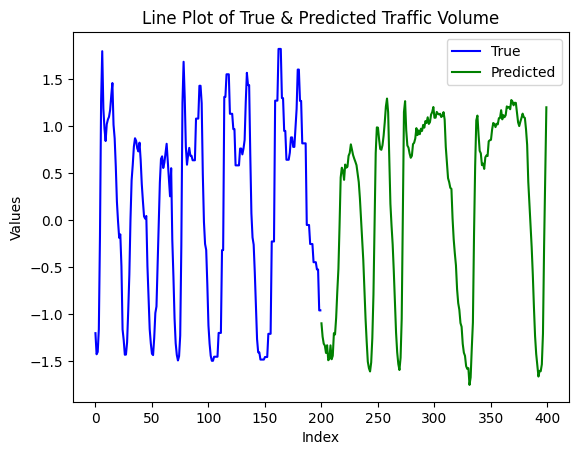

In [ ]:
# get subset of true & predicted traffic volume
true_traffics = trainY[-data_to_show:]
predict_traffic = predicts[:data_to_show]

# Plot true_traffics
plt.plot(true_traffics, label='True', color='blue')

# Plot predict_traffic starting from the end of true_traffics
x_vals = range(len(true_traffics), len(true_traffics) + len(predict_traffic))
plt.plot(x_vals, predict_traffic, label='Predicted', color='green')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Plot of True & Predicted Traffic Volume')

# Show legend
plt.legend()

# Show the plot
plt.show()
